In [1]:
import numpy as np
import pandas as pd

Reading Data files and creating Dataframe

In [2]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

Lets have a look at the data we just imported from CSV files

In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


These 784 columns are our input features which contains pixel values of 28 *28 images. Lets look at the shape of dataframes.

In [4]:
df_train.shape

(60000, 785)

In [5]:
df_test.shape

(10000, 785)

We have 60K samples in our training Dataset and 10K samples in test Dataset.

Let's check the labels by checking unique values in Label column

In [6]:
df_train.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

So we have labels from 0 to 9 which means that we have 10 Catagories of clothing

Lets prepare our training dataset

In [7]:
x_train = df_train.drop('label',1)
# print (x_train.head)

Great, we have removed 'Label' column and took rest of the columns as training samples. Label column is our target.

Let's prepare our target dataset

In [8]:
y_train = df_train['label']
print (y_train.head(10))

0    2
1    9
2    6
3    0
4    3
5    4
6    4
7    5
8    4
9    8
Name: label, dtype: int64


In [9]:
print (type(df_train))
print (type(df_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


**Keras is a Neural Network Library build in Python. Keras works on top of 'TensorFlow' (also works with 'CNTK' and 'Theano').**

Keras accepts tensors as input, we have to convert our data into matrix format before proceeding.

In [10]:
x_train = x_train.as_matrix()
print (type(x_train))
print (x_train.shape)

<class 'numpy.ndarray'>
(60000, 784)


/home/gaurang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [11]:
y_train = y_train.as_matrix()
print (type(y_train))
print (y_train.shape)

<class 'numpy.ndarray'>
(60000,)


/home/gaurang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Let us create a validation set , to check if our model is over fitting or underfitting.

In [12]:
x_train_partial = x_train[:40000]
x_train_val = x_train[40000:]
y_train_partial = y_train[:40000]
y_train_val = y_train[40000:]

### Setting some hyper parameters

In [13]:
n_classes = len(np.unique(y_train))
n_classes

10

In [14]:
batch_size = int(x_train_partial.shape[0]*0.01)
batch_size

400

Since we are dealing with Multi - Category problem meaning we have 10 catagories against one example. This means that for every samples model will create 10 dimension Vector, which is nothing but a vector containing 10 values having probability distribution for 10 catagories. Therefore we need to convert our training labels to catagorial values. 

Again Keras will help us in performing these conversion. Let's see how!

In [15]:
from keras.utils.np_utils import to_categorical
y_train_partial = to_categorical(y_train_partial)
y_train_val = to_categorical(y_train_val)

/home/gaurang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Let's Create our Neural Network Model

## MLP

In [16]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(784,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(n_classes,activation='softmax'))

In above model, we have one Input layer and 5 hidden layers  The last layer is output layer which contains 10 neurons , as we have 10 classes in the porblem.

### Model summary

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 29,674
Trainable params: 29,674
Non-trainable params: 0
_________________________________________________________________


Time to Compile and run the model

In [18]:
from keras.callbacks import EarlyStopping

###### Earlystopping feature  helsp us define the models' learning process, we can set the model to stop training if the validation accuracy or validation loss does not change by a threshold for n epochs

In [19]:
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.001, patience=5, \
                          verbose=1, mode='auto')
callbacks_list = [earlystop]


In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train_partial,
                    y_train_partial,
                    epochs=50,
                    batch_size=batch_size,
                    callbacks=callbacks_list,
                    validation_data=(x_train_val, y_train_val))

Train on 40000 samples, validate on 20000 samples
Epoch 1/50
40000/40000 [==============================] - 3s 64us/step - loss: 3.0163 - acc: 0.5258 - val_loss: 0.9094 - val_acc: 0.6900
Epoch 2/50
40000/40000 [==============================] - 1s 31us/step - loss: 0.7637 - acc: 0.7395 - val_loss: 0.6985 - val_acc: 0.7600
Epoch 3/50
40000/40000 [==============================] - 1s 30us/step - loss: 0.6141 - acc: 0.7851 - val_loss: 0.5955 - val_acc: 0.7939
Epoch 4/50
40000/40000 [==============================] - 1s 31us/step - loss: 0.5453 - acc: 0.8060 - val_loss: 0.5479 - val_acc: 0.8101
Epoch 5/50
40000/40000 [==============================] - 1s 29us/step - loss: 0.5050 - acc: 0.8180 - val_loss: 0.5209 - val_acc: 0.8167
Epoch 6/50
40000/40000 [==============================] - 1s 29us/step - loss: 0.4777 - acc: 0.8263 - val_loss: 0.5074 - val_acc: 0.8192
Epoch 7/50
40000/40000 [==============================] - 1s 30us/step - loss: 0.4538 - acc: 0.8364 - val_loss: 0.4884 - val_acc

I have tried with dropout but that led to poor model performance, meaning we are losing out on information by dropping out.

history object stores the member history as a dictionary . The details as to what happened during training.

###### Let us plot the training and validation loss 

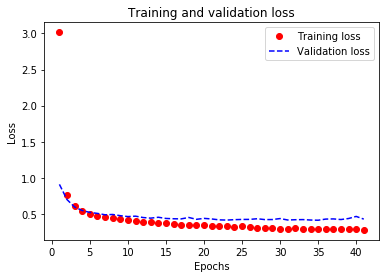

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(history.epoch)+1) # creating a range object for plotting on x axis

plt.plot(epochs, loss_values, 'ro', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b--', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

From the graph we see that training loss consistently decreases and validation loss is in line with training loss.

In [22]:
###### Let us plot the training and validation accuracy 

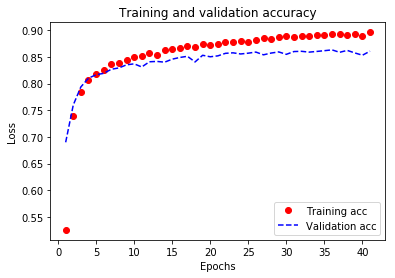

In [23]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'b--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We see that the training accuracy improved  consistently ,although the validation accuracy took a small hit in the process, it caught up eventually!

###### Lets Apply this model to our Test dataset

In [24]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_test.shape

(10000, 785)

In [26]:
x_test = df_test.drop('label',1)
y_test = df_test['label']
x_test = x_test.as_matrix()
y_test = y_test.as_matrix()

/home/gaurang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gaurang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [27]:
print (type(x_test))
print (type(y_test))
print (x_test.shape)
print (y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(10000, 784)
(10000,)


We have to encode the test variable values to categorical again

In [28]:
y_test = to_categorical(y_test)

Time to evaluate our model on Test data!

In [29]:
results = model.evaluate(x_test,y_test)
results

10000/10000 [==============================] - 0s 20us/step


[0.42985831677913666, 0.8604]

Ok, we have 86.1 accuracy with test data! Which is close to the test and validation accuracies, so there is no over fitting.

We can try to improve this further by playing with the architeture. But here we will try implementing CNN